Text Mining AOL

Group 8:
- 2502004102 - Musyaffa Ayman Rafif
- 2501987772 - Salomo Hendrian Sudjono
- 2501996505 - Grace Shirley Cam

# Resume Classification using Machine Learning Models

## 1. Setup Notebook

Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from yellowbrick.model_selection import LearningCurve

In [2]:
df = pd.read_csv('data/Resume.csv')

## 2. Data Preprocessing

In [3]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [4]:
selected_columns = ['Resume_str', 'Category']
df = df[selected_columns]
df.head()

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


Moving forward with data preprocessing, two columns were selected: 'Resume_str' and 'Category'. 'Resume_str' contains the text of the resumes, while 'Category' indicates the resume category. These columns will be used to extract information from the resumes and classify them into their appropriate categories.

### Data Cleaning

This code defines a function called text_cleansing that takes a dataframe (df) as input and returns a new dataframe with a cleaned 'Cleaned_text' column.

In [5]:
def text_cleansing(df):
    df_clean = [text.lower() for text in df]
    df_clean = [re.sub(r"\d+", "", text) for text in df_clean]
    df_clean = [re.sub(r'[^\w]', ' ', text) for text in df_clean]
    df_clean = [re.sub(r'\s+', ' ', text) for text in df_clean]
    return df_clean


Here's a breakdown of the steps involved:

1. Lowercase Conversion: text.lower() converts all text in the dataframe to lowercase, ensuring consistency and avoiding case-sensitivity issues.
2. Number Removal: re.sub(r"\d+", "", text) removes all digits from the text using regular expressions. This is useful if you're focusing on the textual content of the resumes.
3. Non-alphanumeric Character Removal: re.sub(r'[^\w]', ' ', text) removes any non-alphanumeric characters (punctuation, special symbols, etc.) and replaces them with a space. This helps prepare the text for further processing.
4. Whitespace Reduction: re.sub(r'\s+', ' ', text) replaces multiple consecutive spaces with a single space. This ensures consistent spacing and avoids empty tokens during tokenization (splitting into individual words).

In [6]:
df['Cleaned_text'] = text_cleansing(df['Resume_str'])

In [7]:
df.head()

,Resume_str,Category,Cleaned_text
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administrator marketing associate hr admin...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versat...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in ...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dy...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depa...


In [8]:
cleaned_columns = ['Cleaned_text', 'Category']
df_cleaned = df[cleaned_columns]
df_cleaned.head()

,Cleaned_text,Category
0,hr administrator marketing associate hr admin...,HR
1,hr specialist us hr operations summary versat...,HR
2,hr director summary over years experience in ...,HR
3,hr specialist summary dedicated driven and dy...,HR
4,hr manager skill highlights hr skills hr depa...,HR


The code selects two columns from the cleaned dataframe: 'Cleaned_text' and 'Category'. The 'Cleaned_text' column contains the cleaned text of the resumes, while the 'Category' column indicates the resume category. 

In [9]:
df_cleaned.to_csv('data/Resume_clean.csv') # Save dulu

### Tokenization

In [10]:
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(word_tokenize_wrapper)
df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_10244\955287719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(word_tokenize_wrapper)


,Cleaned_text,Category
0,"[hr, administrator, marketing, associate, hr, ...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, over, years, experienc...",HR
3,"[hr, specialist, summary, dedicated, driven, a...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR


The code applies the word_tokenize() function to each row in the 'Cleaned_text' column of the dataframe df_cleaned. The word_tokenize() function splits the text into individual words, returning a list of tokens. The resulting list of tokens is then stored back in the 'Cleaned_text' column of the dataframe.

### Remove Stopwords

In [11]:
list_stopwords = stopwords.words('english')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(stopwords_removal)
df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_10244\2881813264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(stopwords_removal)


,Cleaned_text,Category
0,"[hr, administrator, marketing, associate, hr, ...",HR
1,"[hr, specialist, us, hr, operations, summary, ...",HR
2,"[hr, director, summary, years, experience, rec...",HR
3,"[hr, specialist, summary, dedicated, driven, d...",HR
4,"[hr, manager, skill, highlights, hr, skills, h...",HR



In this step, further refinement of the text continues with the removal of stop words. A pre-defined list of common, non-meaningful words in English (list_stopwords) is used. The stopwords_removal function iterates through each tokenized text in the 'Cleaned_text' column, discarding any words present in the stop words list. The remaining words, carrying the essential meaning of the text, are stored back in the same column. This step helps eliminate noise and focus on the most relevant content for subsequent analysis.

### Lemmatization

In [12]:
lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = " ".join(lemmatized_tokens)
    return lemmatized_text

df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(lambda tokens: lemmatization(tokens))

df_cleaned.head()

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_10244\3925164240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cleaned_text'] = df_cleaned['Cleaned_text'].apply(lambda tokens: lemmatization(tokens))


,Cleaned_text,Category
0,hr administrator marketing associate hr admini...,HR
1,hr specialist u hr operation summary versatile...,HR
2,hr director summary year experience recruiting...,HR
3,hr specialist summary dedicated driven dynamic...,HR
4,hr manager skill highlight hr skill hr departm...,HR



In this step, the cleaned text undergoes further refining through lemmatization. The code utilizes a WordNet lemmatizer to convert each token in the 'Cleaned_text' column to its base form, the lemma. This reduces words to their core meaning, ensuring consistency and eliminating variations due to inflection. The lemmatization function iterates through each tokenized text, applies the lemmatizer, and rejoins the processed tokens into a single string. This lemmatized text is then stored back in the 'Cleaned_text' column, resulting in a more standardized and semantically rich representation of the resume content.

In [13]:
df_cleaned['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


From the value counts of the 'Category' column in the df_cleaned DataFrame, we can derive insights into the distribution of resumes across different job categories. 

In [14]:
df_cleaned

,Cleaned_text,Category
0,hr administrator marketing associate hr admini...,HR
1,hr specialist u hr operation summary versatile...,HR
2,hr director summary year experience recruiting...,HR
3,hr specialist summary dedicated driven dynamic...,HR
4,hr manager skill highlight hr skill hr departm...,HR
...,...,...
2479,rank sgt e non commissioned officer charge bri...,AVIATION
2480,government relation communication organization...,AVIATION
2481,geek squad agent professional profile support ...,AVIATION
2482,program director office manager summary highly...,AVIATION


## 3. Exploratory Data Analysis

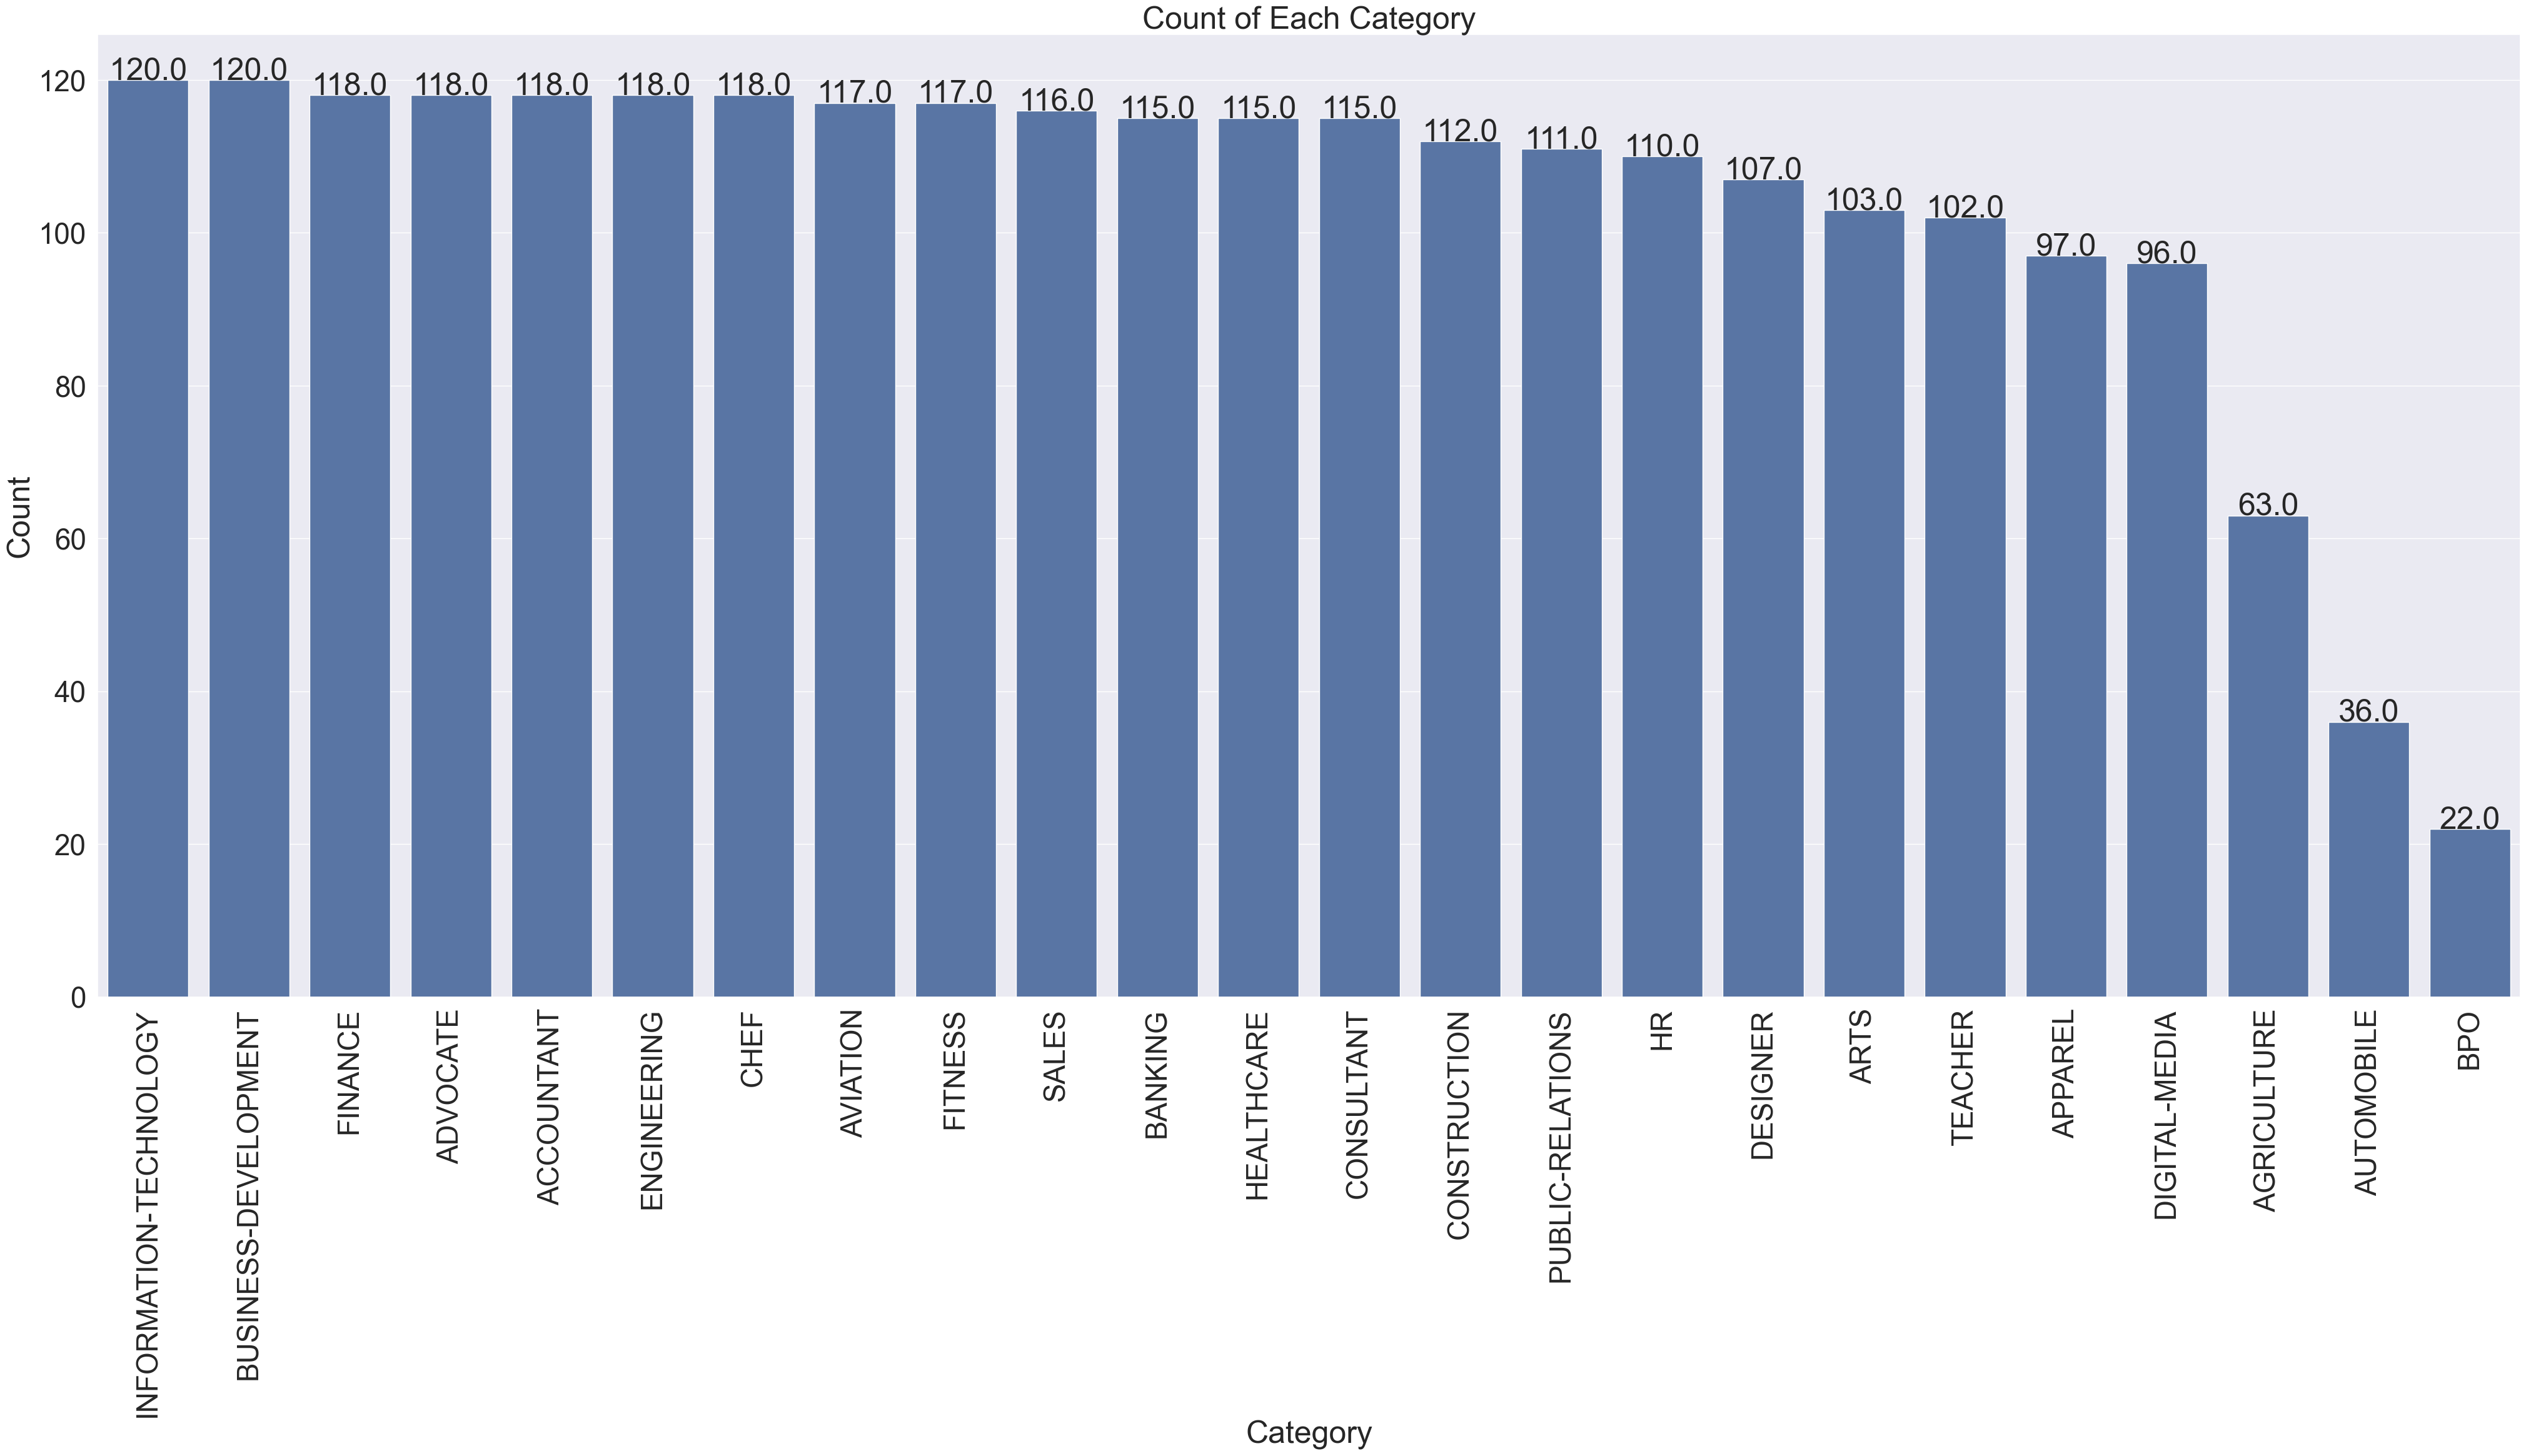

In [15]:
sns.set(font_scale=3)  
plt.figure(figsize=(50, 20))  

category_counts = df_cleaned['Category'].value_counts()
category_order = category_counts.index
color_palette = sns.color_palette("Set2", len(category_order))

ax = sns.countplot(data=df_cleaned, x='Category', order=category_counts.index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.xticks(rotation=90)

plt.show()

The dataset appears to be well-balanced across various job categories, with a relatively consistent number of resumes for each category. The categories with the highest number of resumes include 'INFORMATION-TECHNOLOGY' and 'BUSINESS-DEVELOPMENT,' each comprising 120 resumes. Following closely are 'FINANCE,' 'ADVOCATE,' 'ACCOUNTANT,' and 'ENGINEERING,' each with 118 resumes. This balanced distribution suggests a diverse representation of job sectors, contributing to a robust dataset for training and evaluating machine learning models.

On the other hand, certain categories, such as 'AUTOMOBILE' and 'BPO,' exhibit lower counts, with 36 and 22 resumes, respectively. This might imply a lower prevalence of resumes in these specific job domains within the dataset.

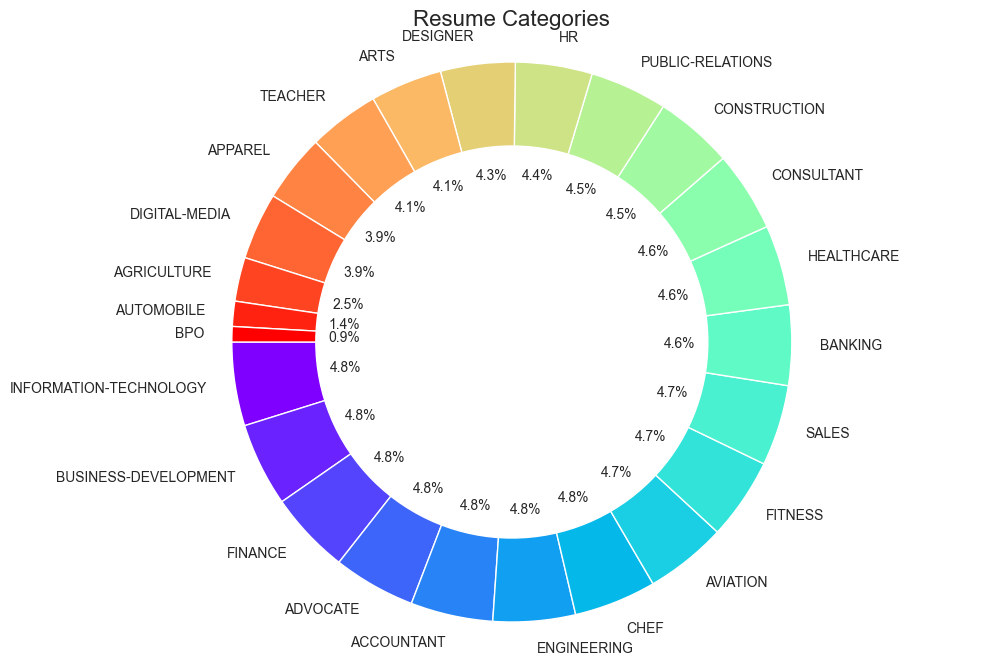

In [16]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(category_counts.index)))

plt.figure(figsize=(12, 8))
plt.pie(category_counts, 
        labels=category_counts.index, 
        autopct='%1.1f%%', 
        shadow=False, 
        colors=colors, 
        startangle=180, 
        textprops={'fontsize': 10})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.title("Resume Categories", fontsize=16)
plt.show()

## 4. Text Representation

### Label Encoding

In [17]:
label_to_numeric = {
    'INFORMATION-TECHNOLOGY': 1,
    'BUSINESS-DEVELOPMENT': 2,
    'FINANCE': 3,
    'ADVOCATE': 4,
    'ACCOUNTANT': 5,
    'ENGINEERING': 6,
    'CHEF': 7,
    'AVIATION': 8,
    'FITNESS': 9,
    'SALES': 10,
    'BANKING': 11,
    'HEALTHCARE': 12,
    'CONSULTANT': 13,
    'CONSTRUCTION': 14,
    'PUBLIC-RELATIONS': 15,
    'HR': 16,
    'DESIGNER': 17,
    'ARTS': 18,
    'TEACHER': 19,
    'APPAREL': 20,
    'DIGITAL-MEDIA': 21,
    'AGRICULTURE': 22,
    'AUTOMOBILE': 23,
    'BPO': 24
}

df_cleaned['Labeled_category'] = df_cleaned['Category'].map(label_to_numeric)

### Train Test Split & BoW

This function streamlines the preprocessing of text data by performing a train-test split and converting the text into a Bag-of-Words representation using Count Vectorization. The resulting variables are then suitable for training and evaluating machine learning models for text classification tasks.

In [18]:
def preprocess_text_data(data, target, test_size=0.3, random_state=24):
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=test_size, random_state=random_state, stratify=target
    )
    
    vectorizer_train = CountVectorizer(stop_words='english', min_df=3, max_features=500)

    X_train_bow = vectorizer_train.fit_transform(X_train)

    feature_names = vectorizer_train.get_feature_names_out()

    bow_array_train = X_train_bow.toarray()

    X_test_bow = vectorizer_train.transform(X_test)

    bow_array_test = X_test_bow.toarray()

    return X_train_bow, X_test_bow, y_train, y_test, feature_names, bow_array_train, bow_array_test


X_train_bow, X_test_bow, y_train, y_test, feature_names, bow_array_train, bow_array_test = preprocess_text_data(
    df_cleaned['Cleaned_text'], df_cleaned['Labeled_category']
)

In [19]:
y_train.value_counts()

Labeled_category
1     84
2     84
4     83
6     83
5     83
7     83
3     83
9     82
8     82
10    81
13    80
11    80
12    80
14    78
15    78
16    77
17    75
18    72
19    71
20    68
21    67
22    44
23    25
24    15
Name: count, dtype: int64

In [20]:
y_test.value_counts()

Labeled_category
1     36
2     36
9     35
7     35
13    35
4     35
6     35
11    35
8     35
3     35
5     35
10    35
12    35
14    34
15    33
16    33
17    32
18    31
19    31
21    29
20    29
22    19
23    11
24     7
Name: count, dtype: int64

In [21]:
print(len(bow_array_train))

1738


In [22]:
print(len(bow_array_test))

746


C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_10244\1259295576.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=top_words, y=top_word_freqs, palette='viridis')


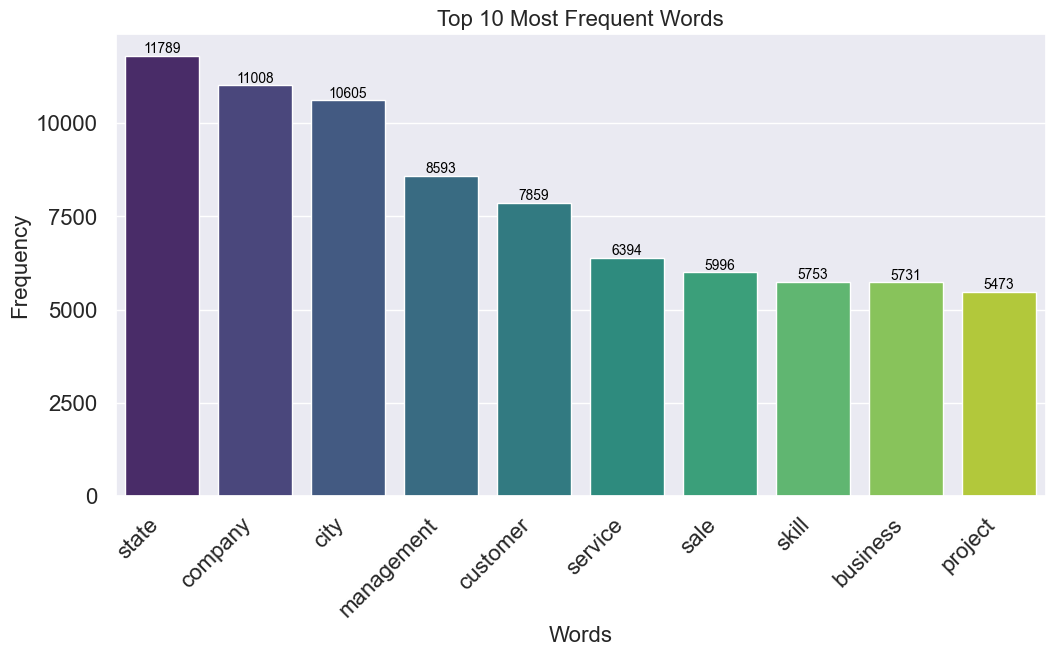

C:\Users\MSI GL65\AppData\Local\Temp\ipykernel_10244\1259295576.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_bottom = sns.barplot(x=bottom_words, y=bottom_word_freqs, palette='viridis')


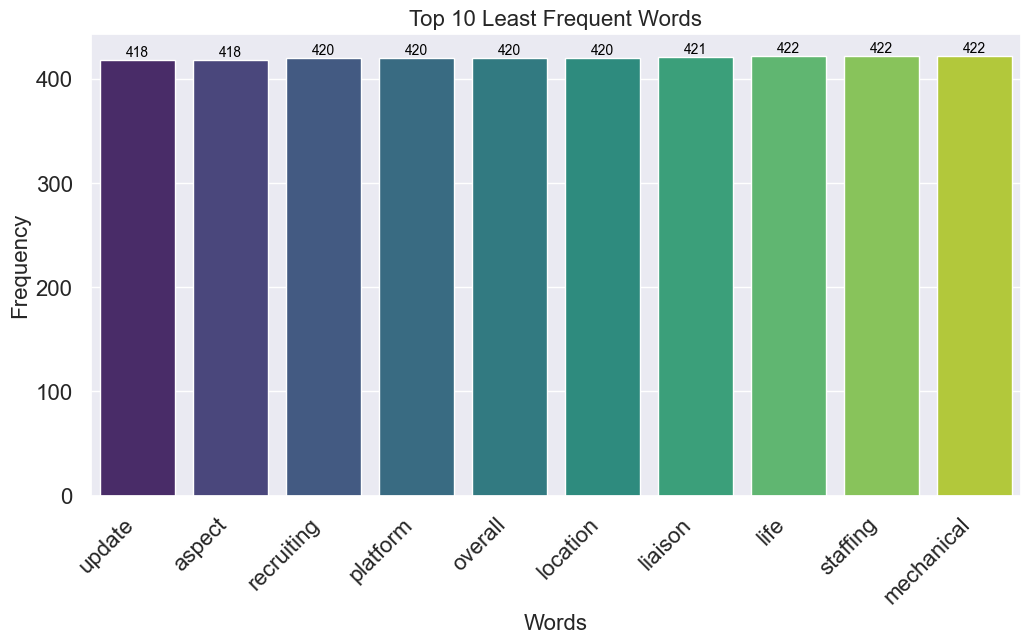

In [23]:
top_n = 10
bottom_n = 10

grouped_df_train = pd.DataFrame(bow_array_train, columns=feature_names)
grouped_df_test = pd.DataFrame(bow_array_test, columns=feature_names)

top_words = grouped_df_train.sum().sort_values(ascending=False).head(top_n).index
bottom_words = grouped_df_train.sum().sort_values(ascending=True).head(bottom_n).index

label_fontsize = 16
tick_fontsize = 16

plt.figure(figsize=(12, 6))
top_word_freqs = grouped_df_train[top_words].sum()
bar_plot = sns.barplot(x=top_words, y=top_word_freqs, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words', fontsize=label_fontsize)
plt.xlabel('Words', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

for i, v in enumerate(top_word_freqs):
    bar_plot.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

plt.figure(figsize=(12, 6))
bottom_word_freqs = grouped_df_train[bottom_words].sum()
bar_plot_bottom = sns.barplot(x=bottom_words, y=bottom_word_freqs, palette='viridis')
plt.title(f'Top {bottom_n} Least Frequent Words', fontsize=label_fontsize)
plt.xlabel('Words', fontsize=label_fontsize)
plt.ylabel('Frequency', fontsize=label_fontsize)
plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

for i, v in enumerate(bottom_word_freqs):
    bar_plot_bottom.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

From the bar plots provided, which showcase the top 10 most frequent and least frequent words in the Bag-of-Words representation of the training data.

The top 10 most frequent words represent common terms that frequently appear across the resumes in the dataset. Their high frequency suggests that they may be generic terms used in various job contexts, such as indicating geographical locations, company names, managerial skills, and project-related activities.

In contrast, the least frequent words represent terms that appear infrequently across the dataset. These less common words may denote specific or specialized skills, tasks, or attributes that are not universally present in the resumes.

In [24]:
def get_most_frequent_words(bow_array, feature_names, labels, top_n=10):
    most_frequent_words = {}
    for label in np.unique(labels):
        label_indices = np.where(labels == label)[0]
        label_bow = bow_array[label_indices, :]
        label_word_freq = np.sum(label_bow, axis=0)
        sorted_indices = np.argsort(label_word_freq)[::-1][:top_n]
        top_words = [feature_names[i] for i in sorted_indices]
        most_frequent_words[label] = {'top_words': top_words, 'word_freq': label_word_freq[sorted_indices]}
    return most_frequent_words

This function is designed to extract the most frequent words within each category or label from a Bag-of-Words (BoW) representation.  It facilitates a more detailed exploration of the word distribution within individual categories, aiding in the interpretation of the textual content associated with different job roles or classifications.

In [25]:
numeric_to_label = {
    1: 'INFORMATION-TECHNOLOGY',
    2: 'BUSINESS-DEVELOPMENT',
    3: 'FINANCE',
    4: 'ADVOCATE',
    5: 'ACCOUNTANT',
    6: 'ENGINEERING',
    7: 'CHEF',
    8: 'AVIATION',
    9: 'FITNESS',
    10: 'SALES',
    11: 'BANKING',
    12: 'HEALTHCARE',
    13: 'CONSULTANT',
    14: 'CONSTRUCTION',
    15: 'PUBLIC-RELATIONS',
    16: 'HR',
    17: 'DESIGNER',
    18: 'ARTS',
    19: 'TEACHER',
    20: 'APPAREL',
    21: 'DIGITAL-MEDIA',
    22: 'AGRICULTURE',
    23: 'AUTOMOBILE',
    24: 'BPO'
}

In [26]:
def plot_most_frequent_words(bow_array, feature_names, labels, numeric_to_label, num_columns=2, label_size=13, tick_size=14):
    most_frequent_words = get_most_frequent_words(bow_array, feature_names, labels)

    # Calculate the number of rows needed based on the number of categories and columns
    num_categories = len(most_frequent_words)
    num_rows = (num_categories + num_columns - 1) // num_columns

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))
    fig.suptitle("Most Frequent Words for Each Category", y=1.02, fontsize=16) 

    # Flatten the axes array to handle the case when there is only one row
    axes = axes.flatten()

    # Plot the most frequent words for each category with frequency values above the bars
    for idx, (label, info) in enumerate(most_frequent_words.items()):
        category_name = numeric_to_label[label]
        top_words = info['top_words']
        word_freq = info['word_freq']

        indices = [np.where(feature_names == word)[0][0] for word in top_words]

        bars = axes[idx].bar(top_words, [np.sum(bow_array[labels == label, index]) for index in indices], color=plt.cm.rainbow(np.linspace(0, 1, len(top_words))))
        axes[idx].set_title(f"Label {category_name}", fontsize=label_size)  # Adjust subplot title size
        axes[idx].set_xlabel("Words", fontsize=label_size)  # Adjust x-axis label size
        axes[idx].set_ylabel("Frequency", fontsize=label_size)  # Adjust y-axis label size

        # Rotate x-axis labels by 90 degrees
        axes[idx].tick_params(axis='x', rotation=90, labelsize=tick_size)  # Adjust x-axis tick size

        # Display frequency values above the bars
        for bar, freq in zip(bars, word_freq):
            axes[idx].text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(freq)), ha='center', va='bottom', fontsize=13, color='black')

        # Adjust y-axis tick size
        axes[idx].tick_params(axis='y', labelsize=tick_size)

    # Adjust layout
    plt.tight_layout()
    plt.show()


This function provides a visually informative representation of the most frequent words for each category, aiding in the interpretation of the dataset's textual characteristics within different labels or job categories.

#### Before Remove Unnecessary Words

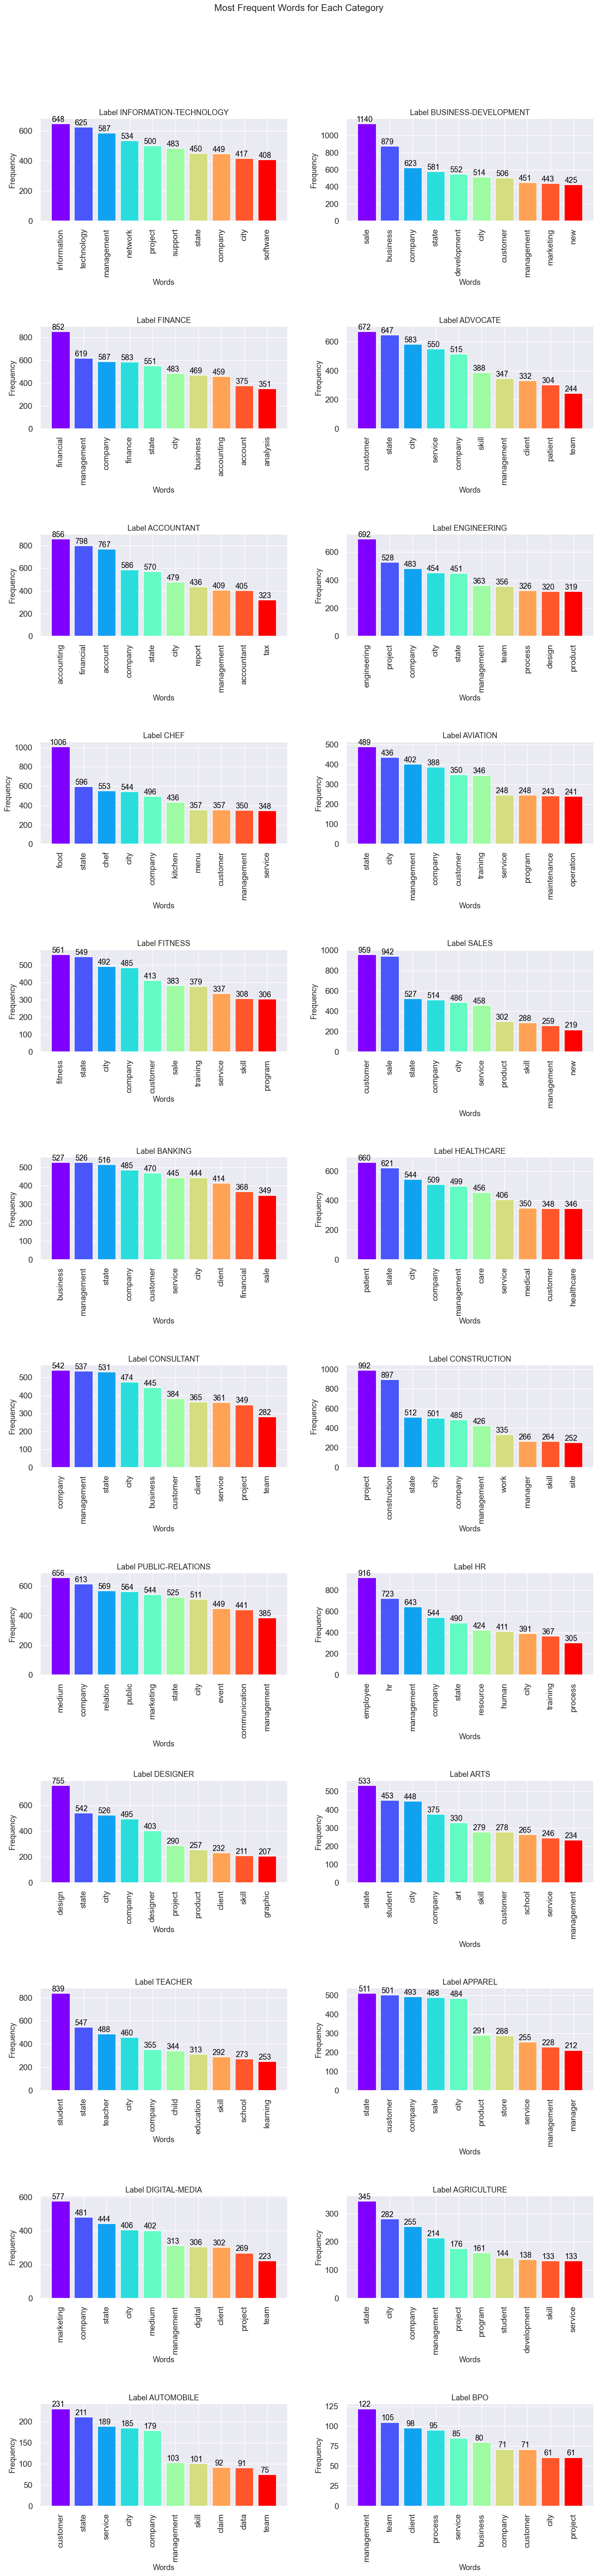

In [27]:
plot_most_frequent_words(bow_array_train, feature_names, y_train, numeric_to_label)

#### Remove Unnecessary Words

In [28]:
def remove_extra_word(text):
    
    extra_word=['company', 'name', 'city', 'state', 'work', 'management']
    words = text.split() 
    
    filter_word = [word for word in words if word not in extra_word]
    
    filter_text = ' '.join(filter_word)
    
    return filter_text

df_cleaned['Cleaned_text']=df_cleaned['Cleaned_text'].apply(lambda x:remove_extra_word(x))

In an effort to refine the textual representation of the resumes, a preprocessing step was introduced to remove certain unnecessary words that may not contribute significantly to the classification task. The function remove_extra_word was applied to each entry in the 'Cleaned_text' column of the DataFrame, specifically targeting words such as 'company,' 'name,' 'city,' 'state,' 'work,' and 'management.' These words, deemed extraneous for the purpose of resume classification, were excluded to enhance the focus on more meaningful and discriminative terms within the dataset.

Following this text cleaning process, a new analysis of the most frequent words for each category was conducted. The revised dataset, with extraneous words removed, provides a clearer insight into the distinctive vocabulary associated with various job categories. By eliminating non-discriminatory terms, the subsequent visualization aims to highlight the more relevant and indicative words that contribute to the differentiation of job roles. This iterative refinement not only enhances the interpretability of the dataset but also contributes to the optimization of the text representation for more effective machine learning model training and classification accuracy.

In [29]:
X_train_bow, X_test_bow, y_train, y_test, feature_names, bow_array_train, bow_array_test = preprocess_text_data(
    df_cleaned['Cleaned_text'], df_cleaned['Labeled_category']
)

#### After Remove Unnecessary Words

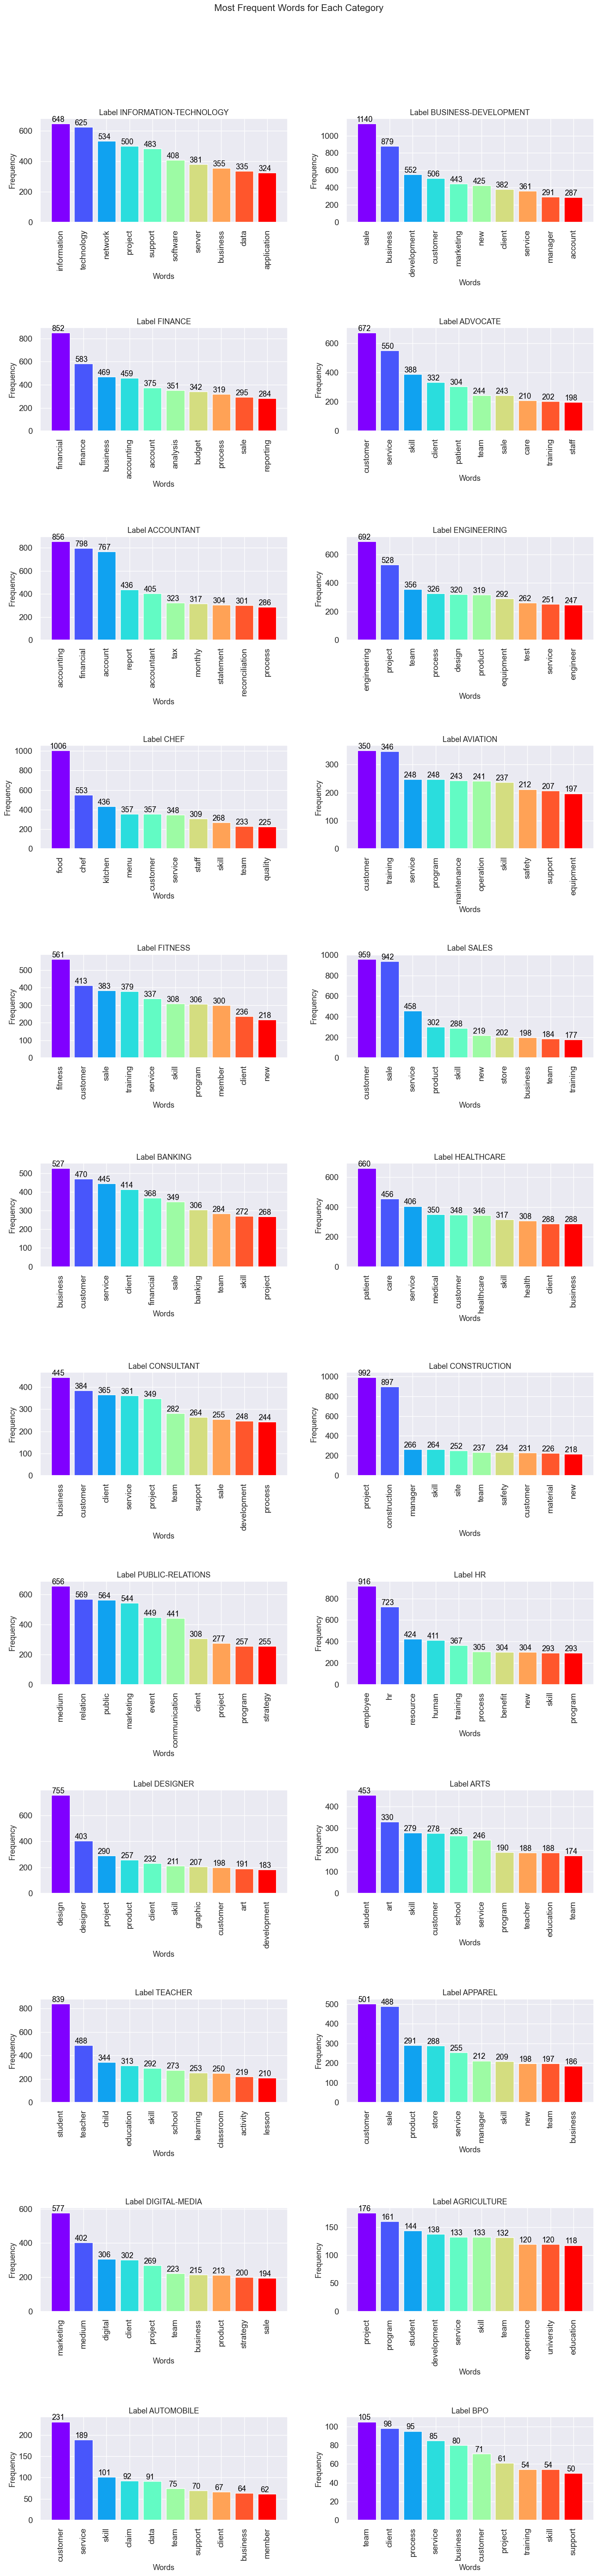

In [30]:
plot_most_frequent_words(bow_array_train, feature_names, y_train, numeric_to_label)

## 4. Model Training

In this step, we used 3 models: Support Vector Classification (SVC), SVC with Linear kernel, and Gradient Boosting Classifier

### SVC

In [31]:
svm = SVC()
svm.fit(bow_array_train,y_train)
svm_pred_train = svm.predict(bow_array_train)
svm_pred_test = svm.predict(bow_array_test)

### SVC With Linear Kernel

In [32]:
svm_linear = SVC(kernel='linear',class_weight='balanced')
svm_linear.fit(bow_array_train,y_train)
svmlinear_pred_train = svm_linear.predict(bow_array_train)
svmlinear_pred_test = svm_linear.predict(bow_array_test)

### Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
g_boost = GradientBoostingClassifier()
g_boost.fit(bow_array_train, y_train)
gboost_pred_train = g_boost.predict(bow_array_train)
gboost_pred_test = g_boost.predict(bow_array_test)

## 5. Model Evaluation

In [34]:
def make_classification_report(model, pred_val, y_test=y_test):
    print(classification_report(pred_val, y_test))

In [35]:
make_classification_report(svm, svm_pred_test)

              precision    recall  f1-score   support

           1       0.67      0.62      0.64        39
           2       0.56      0.50      0.53        40
           3       0.71      0.86      0.78        29
           4       0.66      0.34      0.45        67
           5       0.86      0.77      0.81        39
           6       0.74      0.67      0.70        39
           7       0.77      0.87      0.82        31
           8       0.77      0.46      0.57        59
           9       0.49      0.65      0.56        26
          10       0.66      0.37      0.47        62
          11       0.49      0.71      0.58        24
          12       0.31      0.39      0.35        28
          13       0.37      0.30      0.33        44
          14       0.71      0.83      0.76        29
          15       0.70      0.79      0.74        29
          16       0.76      0.76      0.76        33
          17       0.69      0.88      0.77        25
          18       0.39    

c:\Users\MSI GL65\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI GL65\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MSI GL65\anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Overall accuracy: ~59%
- Varied performance across categories.
- Notable strengths in 'Healthcare,' 'Digital-Media,' and 'Consultant.'
- Challenges in accurately classifying 'BPO,' 'Information-Technology,' and 'Business-Development.'

In [36]:
make_classification_report(svm_linear, svmlinear_pred_test)

              precision    recall  f1-score   support

           1       0.67      0.69      0.68        35
           2       0.47      0.42      0.45        40
           3       0.69      0.69      0.69        35
           4       0.57      0.34      0.43        58
           5       0.77      0.79      0.78        34
           6       0.77      0.75      0.76        36
           7       0.83      0.72      0.77        40
           8       0.60      0.50      0.55        42
           9       0.54      0.53      0.54        36
          10       0.57      0.59      0.58        34
          11       0.66      0.70      0.68        33
          12       0.40      0.50      0.44        28
          13       0.51      0.64      0.57        28
          14       0.76      0.79      0.78        33
          15       0.64      0.66      0.65        32
          16       0.91      0.83      0.87        36
          17       0.78      0.89      0.83        28
          18       0.45    

- Overall accuracy: ~62%
- Improved metrics compared to non-linear SVM.
- Balanced performance across categories.
- Notable improvements in 'Finance,' 'Sales,' and 'Public-Relations.'

In [37]:
make_classification_report(g_boost, gboost_pred_test)

              precision    recall  f1-score   support

           1       0.64      0.88      0.74        26
           2       0.50      0.56      0.53        32
           3       0.80      0.80      0.80        35
           4       0.43      0.31      0.36        48
           5       0.94      0.89      0.92        37
           6       0.80      0.70      0.75        40
           7       0.86      0.83      0.85        36
           8       0.60      0.53      0.56        40
           9       0.69      0.77      0.73        31
          10       0.77      0.57      0.66        47
          11       0.66      0.74      0.70        31
          12       0.51      0.55      0.53        33
          13       0.69      0.59      0.63        41
          14       0.94      0.82      0.88        39
          15       0.67      0.76      0.71        29
          16       0.79      0.87      0.83        30
          17       0.91      0.81      0.85        36
          18       0.42    

- Overall accuracy: ~67%
- Outperformed SVM models.
- Consistent improvements in precision, recall, and F1-score.
- Successes in 'Information-Technology,' 'Digital-Media,' and 'Sales,' with challenges in 'BPO' and 'Consultant.'

In [51]:
accuracy_list_train=[]
model_list_train=[]

accuracy_list_test=[]
model_list_test=[]

def attach_accuracy(model_name, pred_val, y_test, model_list, accuracy_list):
    acc = accuracy_score(pred_val, y_test)* 100
    model_list.append(model_name)
    accuracy_list.append(acc)

In [52]:
attach_accuracy("SVM", svm_pred_train, y_train, model_list_train, accuracy_list_train)
attach_accuracy("SVM With Linear Kernel", svmlinear_pred_train, y_train, model_list_train, accuracy_list_train)
attach_accuracy("Gradient Boosting Classifier", gboost_pred_train, y_train, model_list_train, accuracy_list_train)

In [53]:
attach_accuracy("SVM", svm_pred_test, y_test, model_list_test, accuracy_list_test)
attach_accuracy("SVM With Linear Kernel", svmlinear_pred_test, y_test, model_list_test, accuracy_list_test)
attach_accuracy("Gradient Boosting Classifier", gboost_pred_test, y_test, model_list_test, accuracy_list_test)

In [54]:
accuracy_data_train = pd.DataFrame({'model': model_list_train, 'accuracy': accuracy_list_train})
accuracy_data_test = pd.DataFrame({'model': model_list_test, 'accuracy': accuracy_list_test})

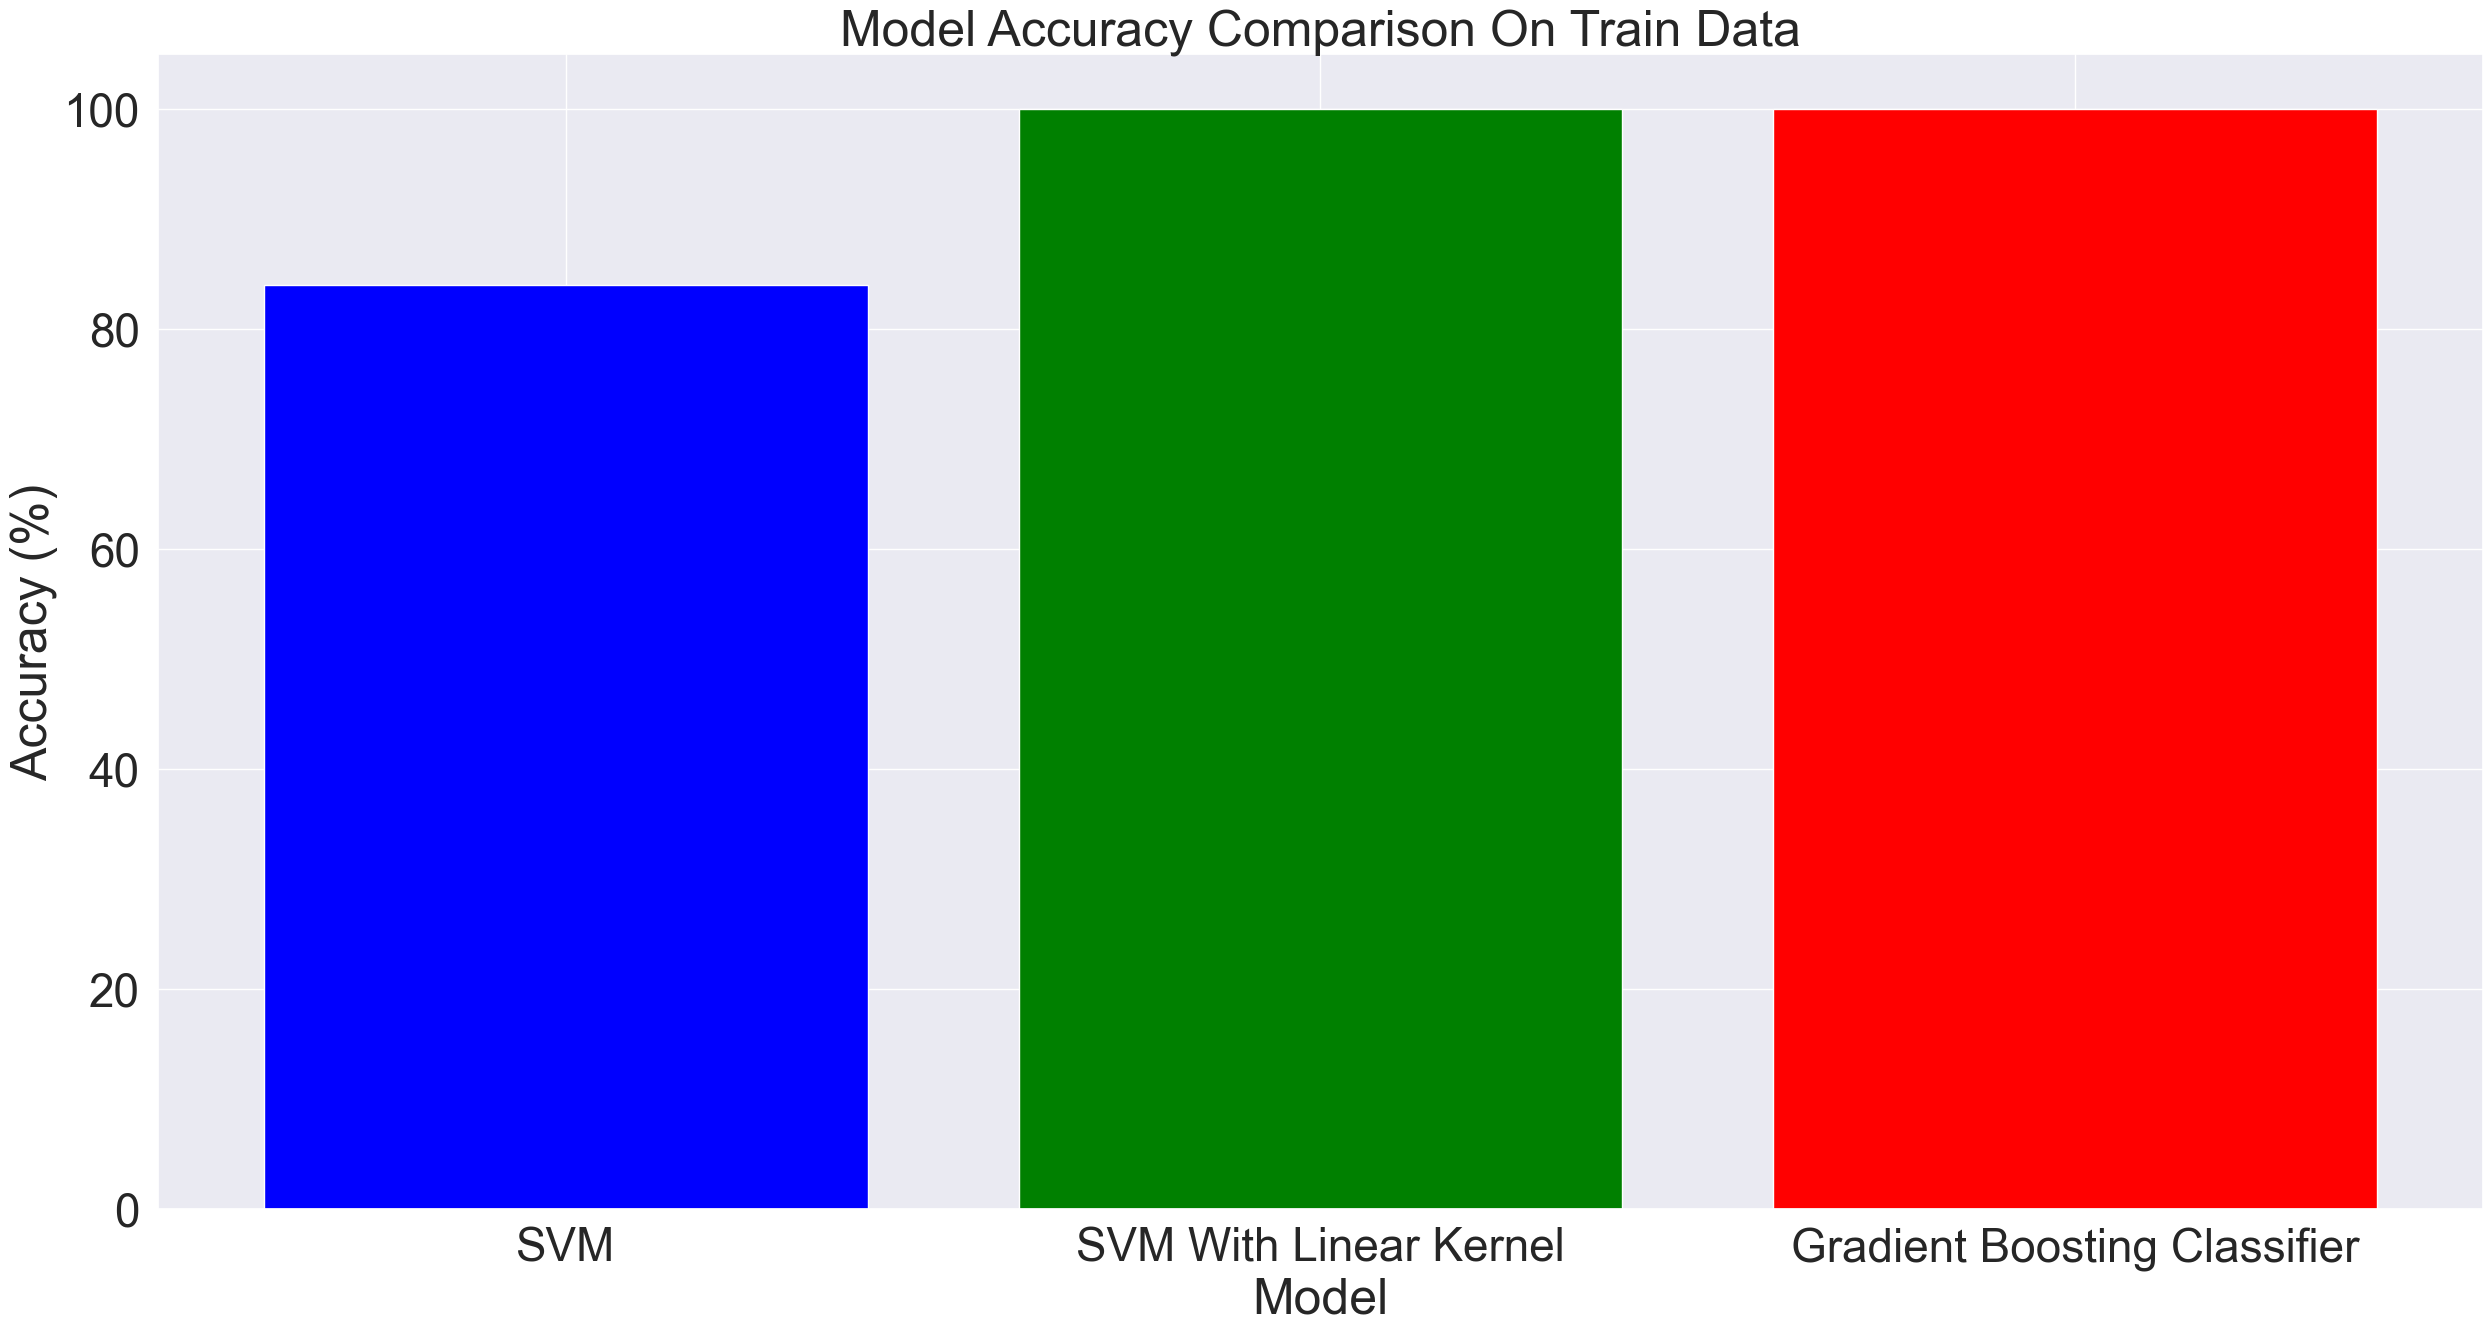

In [55]:
plt.figure(figsize=(30, 15))
plt.bar(accuracy_data_train['model'], accuracy_data_train['accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison On Train Data')
# plt.xticks(rotation=90)
plt.show()

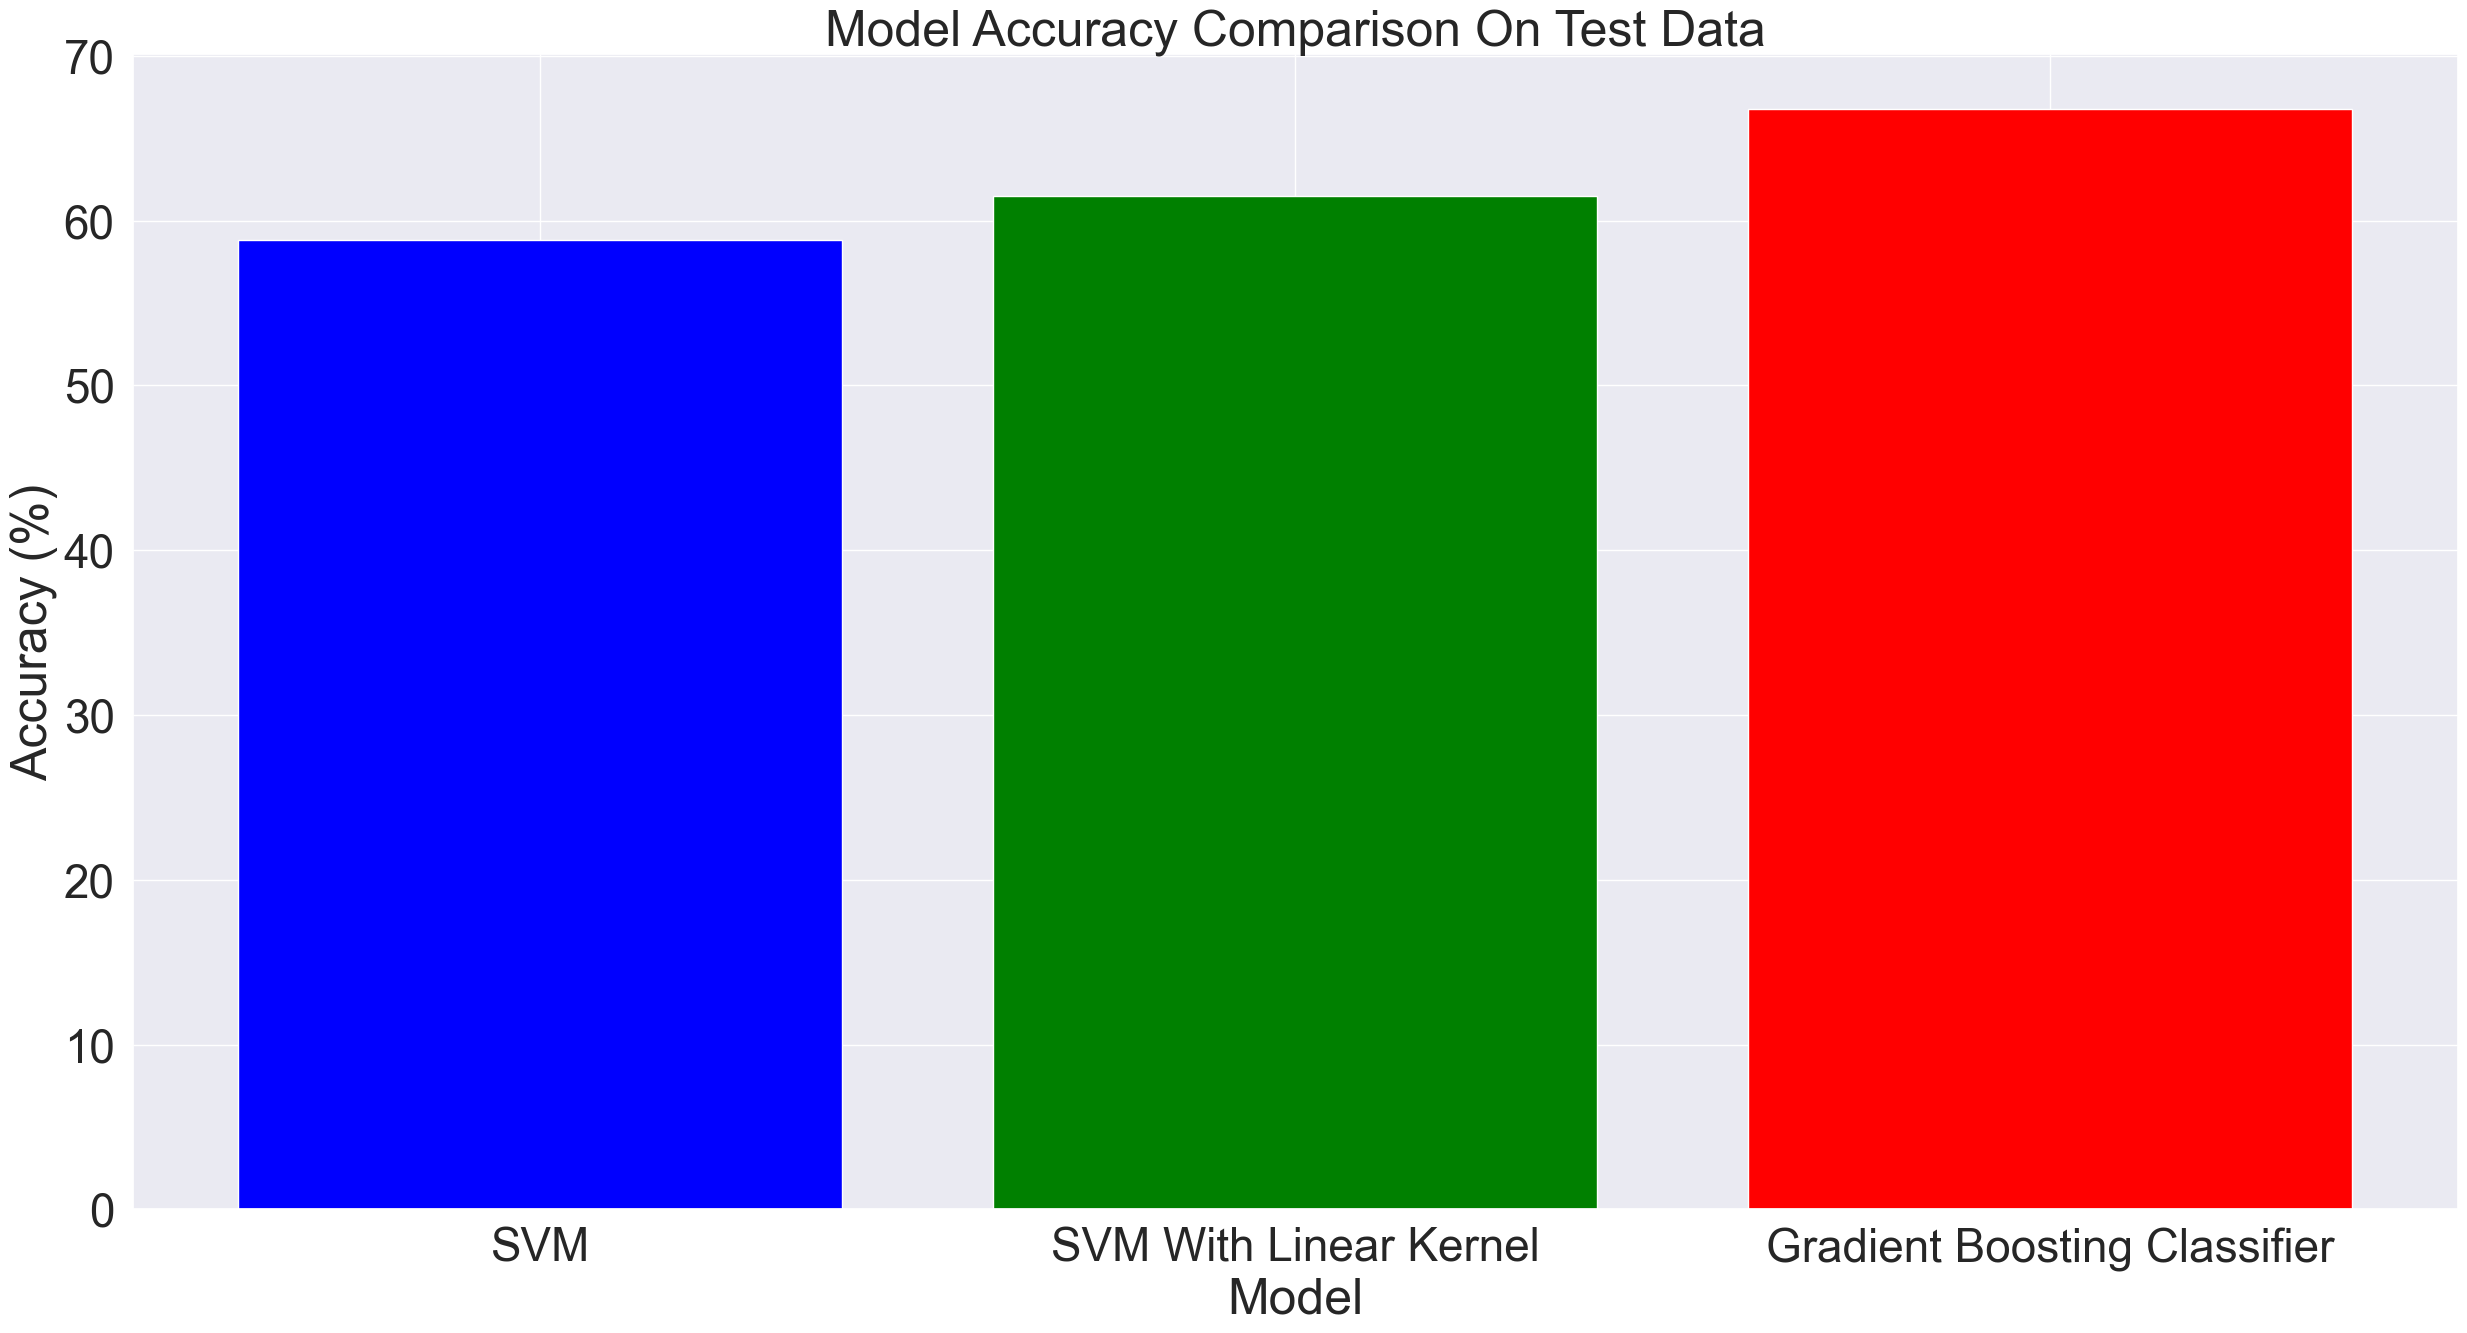

In [56]:
plt.figure(figsize=(30, 15))
plt.bar(accuracy_data_test['model'], accuracy_data_test['accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison On Test Data')
# plt.xticks(rotation=90)
plt.show()

In summary, the Gradient Boosting Classifier demonstrated the highest overall accuracy and generally superior performance across various metrics.

Additionally, it's important to note that the classification performance for labels 22 (AGRICULTURE), 23 (AUTOMOBILE), and 24 (BPO) appears suboptimal. This can be attributed to the limited amount of data available for these specific labels, resulting in a smaller sample size for the model to learn from. The scarcity of data in these categories has a noticeable impact on the classification metrics, leading to lower precision, recall, and F1-score values. It underscores the significance of having a well-balanced dataset with sufficient representation for each job category to achieve more accurate and reliable classification results. 